# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represents 17 marketing campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
import plotly.express as px
import time

from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
set_config(display="diagram")
warnings.filterwarnings('ignore')

from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The *Business Objective* is to use data to support decisions of business managers. Therefore data-driven models should be used to get useful knowledge or patterns from the complex and vast data. Therefore differenct decision models shoulde be compared to give a final statement to the management.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [9]:
# first of all we have to transfer the features to usefull values
# most of the important features are not numbers
# --> therefore we have to transfer the features

In [10]:
# select the important columns
df = pd.DataFrame(df, columns = ['age','job', 'marital', 'education', 'default', 'housing', 'loan', 'y'])

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


### Transform: job

In [12]:
result = df.loc[(df['job'] > ''), ['job']]
result = result.groupby('job').agg(max)
for i in range (len(result)):
    print(f"Show jobs <{i}> data value:  ", result.iloc[i])

Show jobs <0> data value:   Series([], Name: admin., dtype: float64)
Show jobs <1> data value:   Series([], Name: blue-collar, dtype: float64)
Show jobs <2> data value:   Series([], Name: entrepreneur, dtype: float64)
Show jobs <3> data value:   Series([], Name: housemaid, dtype: float64)
Show jobs <4> data value:   Series([], Name: management, dtype: float64)
Show jobs <5> data value:   Series([], Name: retired, dtype: float64)
Show jobs <6> data value:   Series([], Name: self-employed, dtype: float64)
Show jobs <7> data value:   Series([], Name: services, dtype: float64)
Show jobs <8> data value:   Series([], Name: student, dtype: float64)
Show jobs <9> data value:   Series([], Name: technician, dtype: float64)
Show jobs <10> data value:   Series([], Name: unemployed, dtype: float64)
Show jobs <11> data value:   Series([], Name: unknown, dtype: float64)


The job are important for the buying a product. Therefore the author uses not a one hot encoding of the job instead of sort the data by the purchasing power of the client

In [13]:
# Replace the values:
# entrepreneur         --> 8
# management           --> 7
# self-employed        --> 6
# admin = technician   --> 5
# retired              --> 4
# services=blue-collar --> 3
# housemaid            --> 3
# student              --> 2
# unemployed           --> 1
# unknown              --> delete

In [14]:
df.replace('entrepreneur','8', inplace=True)
df.replace('management','7', inplace=True)
df.replace('self-employed','6', inplace=True)
df.replace('admin.','5', inplace=True)
df.replace('technician','5', inplace=True)
df.replace('retired','4', inplace=True)
df.replace('services','3', inplace=True)
df.replace('blue-collar','3', inplace=True)
df.replace('housemaid','3', inplace=True)
df.replace('student','2', inplace=True)
df.replace('unemployed','1', inplace=True)

In [15]:
# delete rows with job type "unknown"
df = df[df['job'] != 'unknown']

In [16]:
# convert column 'job' to numeric 
df['job'] = df['job'].astype('float')

In [17]:
result = df.loc[(df['job'] != 0), ['job']]
result = result.groupby('job').agg(max)
for i in range (len(result)):
    print(f"Show jobs <{i}> data value:  ", result.iloc[i])

Show jobs <0> data value:   Series([], Name: 1.0, dtype: float64)
Show jobs <1> data value:   Series([], Name: 2.0, dtype: float64)
Show jobs <2> data value:   Series([], Name: 3.0, dtype: float64)
Show jobs <3> data value:   Series([], Name: 4.0, dtype: float64)
Show jobs <4> data value:   Series([], Name: 5.0, dtype: float64)
Show jobs <5> data value:   Series([], Name: 6.0, dtype: float64)
Show jobs <6> data value:   Series([], Name: 7.0, dtype: float64)
Show jobs <7> data value:   Series([], Name: 8.0, dtype: float64)


### Transform: marital

In [18]:
result = df.loc[(df['marital'] > ''), ['marital']]
result = result.groupby('marital').agg(max)
for i in range (len(result)):
    print(f"Show marital <{i}> data value:  ", result.iloc[i])

Show marital <0> data value:   Series([], Name: divorced, dtype: float64)
Show marital <1> data value:   Series([], Name: married, dtype: float64)
Show marital <2> data value:   Series([], Name: single, dtype: float64)
Show marital <3> data value:   Series([], Name: unknown, dtype: float64)


In [19]:
# delete unknown
df = df[df['marital'] != 'unknown']

In [20]:
# use one hot encoding for the marital status
df = pd.get_dummies(df, columns = ['marital']) 
df.head()

,age,job,education,default,housing,loan,y,marital_divorced,marital_married,marital_single
0,56,3.0,basic.4y,no,no,no,no,0,1,0
1,57,3.0,high.school,unknown,no,no,no,0,1,0
2,37,3.0,high.school,no,yes,no,no,0,1,0
3,40,5.0,basic.6y,no,no,no,no,0,1,0
4,56,3.0,high.school,no,no,yes,no,0,1,0


### Transform: education

In [21]:
result = df.loc[(df['education'] > ''), ['education']]
result = result.groupby('education').agg(max)
for i in range (len(result)):
    print(f"Show education <{i}> data value:  ", result.iloc[i])

Show education <0> data value:   Series([], Name: basic.4y, dtype: float64)
Show education <1> data value:   Series([], Name: basic.6y, dtype: float64)
Show education <2> data value:   Series([], Name: basic.9y, dtype: float64)
Show education <3> data value:   Series([], Name: high.school, dtype: float64)
Show education <4> data value:   Series([], Name: illiterate, dtype: float64)
Show education <5> data value:   Series([], Name: professional.course, dtype: float64)
Show education <6> data value:   Series([], Name: university.degree, dtype: float64)
Show education <7> data value:   Series([], Name: unknown, dtype: float64)


In [22]:
# delete unknown
df = df[df['education'] != 'unknown']

In [23]:
result = df.loc[(df['education'] == 'professional.course'), ['education']]
result = len(result)
print(f"Show education <professional.course> amount:  ", result)

Show education <professional.course> amount:   5225


In [24]:
result = df.loc[(df['education'] == 'high.school'), ['education']]
result = len(result)
print(f"Show education <high school> amount:  ", result)

Show education <high school> amount:   9464


In [25]:
# Transform the values according to the years of learning

# Replace the values:
# illiterate         --> 0
# basic.4y           --> 4
# basic.6y           --> 6
# basic.9y           --> 9
# professional.course--> 10
# high.school        --> 13
# university.degree  --> 18

# unknown              --> delete

In [26]:
df.replace('illiterate','0', inplace=True)
df.replace('basic.4y','4', inplace=True)
df.replace('basic.6y','6', inplace=True)
df.replace('basic.9y','9', inplace=True)
df.replace('professional.course','10', inplace=True)
df.replace('high.school','13', inplace=True)
df.replace('university.degree','18', inplace=True)

In [27]:
# convert column 'job' to numeric 
df['education'] = df['education'].astype('float')

In [28]:
df.head()

,age,job,education,default,housing,loan,y,marital_divorced,marital_married,marital_single
0,56,3.0,4.0,no,no,no,no,0,1,0
1,57,3.0,13.0,unknown,no,no,no,0,1,0
2,37,3.0,13.0,no,yes,no,no,0,1,0
3,40,5.0,6.0,no,no,no,no,0,1,0
4,56,3.0,13.0,no,no,yes,no,0,1,0


### Transform: default (credit)

In [29]:
# change the column name from 'default' to 'credit'

In [30]:
# Transform the values according to the credit level

# Replace the values:
# no            --> 0
# yes           --> 1

# unknown       --> delete

In [31]:
df = df.rename({'default': 'credit'}, axis = 1)

In [32]:
# delete 'unkown' rows
df = df[df['credit'] != 'unknown']

In [33]:
df['credit'] = df['credit'].map({'yes': 1, 'no': 0})

In [34]:
# convert column 'credit' to numeric 
df['credit'] = df['credit'].astype('float')

In [35]:
df.head()

,age,job,education,credit,housing,loan,y,marital_divorced,marital_married,marital_single
0,56,3.0,4.0,0.0,no,no,no,0,1,0
2,37,3.0,13.0,0.0,yes,no,no,0,1,0
3,40,5.0,6.0,0.0,no,no,no,0,1,0
4,56,3.0,13.0,0.0,no,yes,no,0,1,0
6,59,5.0,10.0,0.0,no,no,no,0,1,0


### Transform: housing

In [36]:
result = df.loc[(df['housing'] > ''), ['housing']]
result = result.groupby('housing').agg(max)
for i in range (len(result)):
    print(f"Show housing <{i}> data value:  ", result.iloc[i])

Show housing <0> data value:   Series([], Name: no, dtype: float64)
Show housing <1> data value:   Series([], Name: unknown, dtype: float64)
Show housing <2> data value:   Series([], Name: yes, dtype: float64)


In [37]:
# Replace the values:
# no            --> 0
# yes           --> 1
# unkown        --> 0

In [38]:
df['housing'] = df['housing'].map({'yes': 1, 'no': 0, 'unkown' : 0})

In [39]:
result = df.loc[(df['housing'] >= 0), ['housing']]
result = result.groupby('housing').agg(max)
for i in range (len(result)):
    print(f"Show housing <{i}> data value:  ", result.iloc[i])

Show housing <0> data value:   Series([], Name: 0.0, dtype: float64)
Show housing <1> data value:   Series([], Name: 1.0, dtype: float64)


In [40]:
df = df.rename({'housing': 'housing_credit'}, axis = 1)

In [41]:
df.head()

,age,job,education,credit,housing_credit,loan,y,marital_divorced,marital_married,marital_single
0,56,3.0,4.0,0.0,0.0,no,no,0,1,0
2,37,3.0,13.0,0.0,1.0,no,no,0,1,0
3,40,5.0,6.0,0.0,0.0,no,no,0,1,0
4,56,3.0,13.0,0.0,0.0,yes,no,0,1,0
6,59,5.0,10.0,0.0,0.0,no,no,0,1,0


### Transform: loan

In [42]:
result = df.loc[(df['loan'] > ''), ['loan']]
result = result.groupby('loan').agg(max)
for i in range (len(result)):
    print(f"Show loan <{i}> data value:  ", result.iloc[i])

Show loan <0> data value:   Series([], Name: no, dtype: float64)
Show loan <1> data value:   Series([], Name: unknown, dtype: float64)
Show loan <2> data value:   Series([], Name: yes, dtype: float64)


In [43]:
# Replace the values:
# no            --> 0
# yes           --> 1
# unkown        --> 0

In [44]:
df['loan'] = df['loan'].map({'yes': 1, 'no': 0, 'unkown' : 0})

In [45]:
df = df.rename({'loan': 'personal_credit'}, axis = 1)

In [46]:
df.head()

,age,job,education,credit,housing_credit,personal_credit,y,marital_divorced,marital_married,marital_single
0,56,3.0,4.0,0.0,0.0,0.0,no,0,1,0
2,37,3.0,13.0,0.0,1.0,0.0,no,0,1,0
3,40,5.0,6.0,0.0,0.0,0.0,no,0,1,0
4,56,3.0,13.0,0.0,0.0,1.0,no,0,1,0
6,59,5.0,10.0,0.0,0.0,0.0,no,0,1,0


### Transform: y

In [47]:
result = df.loc[(df['y'] > ''), ['y']]
result = result.groupby('y').agg(max)
for i in range (len(result)):
    print(f"Show y <{i}> data value:  ", result.iloc[i])

Show y <0> data value:   Series([], Name: no, dtype: float64)
Show y <1> data value:   Series([], Name: yes, dtype: float64)


In [48]:
# Replace the values:
# no            --> 0
# yes           --> 1

In [49]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [50]:
df.head()

,age,job,education,credit,housing_credit,personal_credit,y,marital_divorced,marital_married,marital_single
0,56,3.0,4.0,0.0,0.0,0.0,0,0,1,0
2,37,3.0,13.0,0.0,1.0,0.0,0,0,1,0
3,40,5.0,6.0,0.0,0.0,0.0,0,0,1,0
4,56,3.0,13.0,0.0,0.0,1.0,0,0,1,0
6,59,5.0,10.0,0.0,0.0,0.0,0,0,1,0


### Check data set

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31227 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               31227 non-null  int64  
 1   job               31227 non-null  float64
 2   education         31227 non-null  float64
 3   credit            31227 non-null  float64
 4   housing_credit    30488 non-null  float64
 5   personal_credit   30488 non-null  float64
 6   y                 31227 non-null  int64  
 7   marital_divorced  31227 non-null  uint8  
 8   marital_married   31227 non-null  uint8  
 9   marital_single    31227 non-null  uint8  
dtypes: float64(5), int64(2), uint8(3)
memory usage: 2.0 MB


In [52]:
df.describe()

,age,job,education,credit,housing_credit,personal_credit,y,marital_divorced,marital_married,marital_single
count,31227.000000,31227.000000,31227.000000,31227.000000,30488.000000,30488.000000,31227.000000,31227.000000,31227.000000,31227.000000
mean,39.022865,4.491594,12.689852,0.000096,0.541885,0.156389,0.126493,0.116950,0.573478,0.309572
std,10.330347,1.491458,4.536992,0.009801,0.498251,0.363230,0.332410,0.321366,0.494579,0.462325
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,5.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,45.000000,5.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,95.000000,8.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


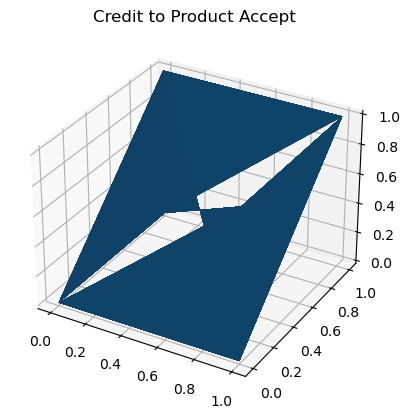

In [53]:
# try some plots for better understanding
ax = plt.axes(projection = '3d')
ax.plot_surface(df['housing_credit'], df['personal_credit'], np.array([df['housing_credit'], df['personal_credit']]), alpha = 0.2)
plt.title('Credit to Product Accept');

Text(0.5, 0, 'Accept Product')

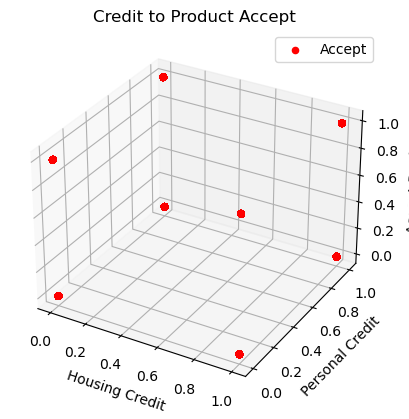

In [54]:
# try some plots for better understanding
ax = plt.axes(projection = '3d')
plt.title('Credit to Product Accept');
ax.scatter3D(df['housing_credit'], df['personal_credit'], df['y'],  c = 'red', label = 'Accept', marker='o')
plt.legend()
ax.set_xlabel('Housing Credit')
ax.set_ylabel('Personal Credit')
ax.set_zlabel('Accept Product')

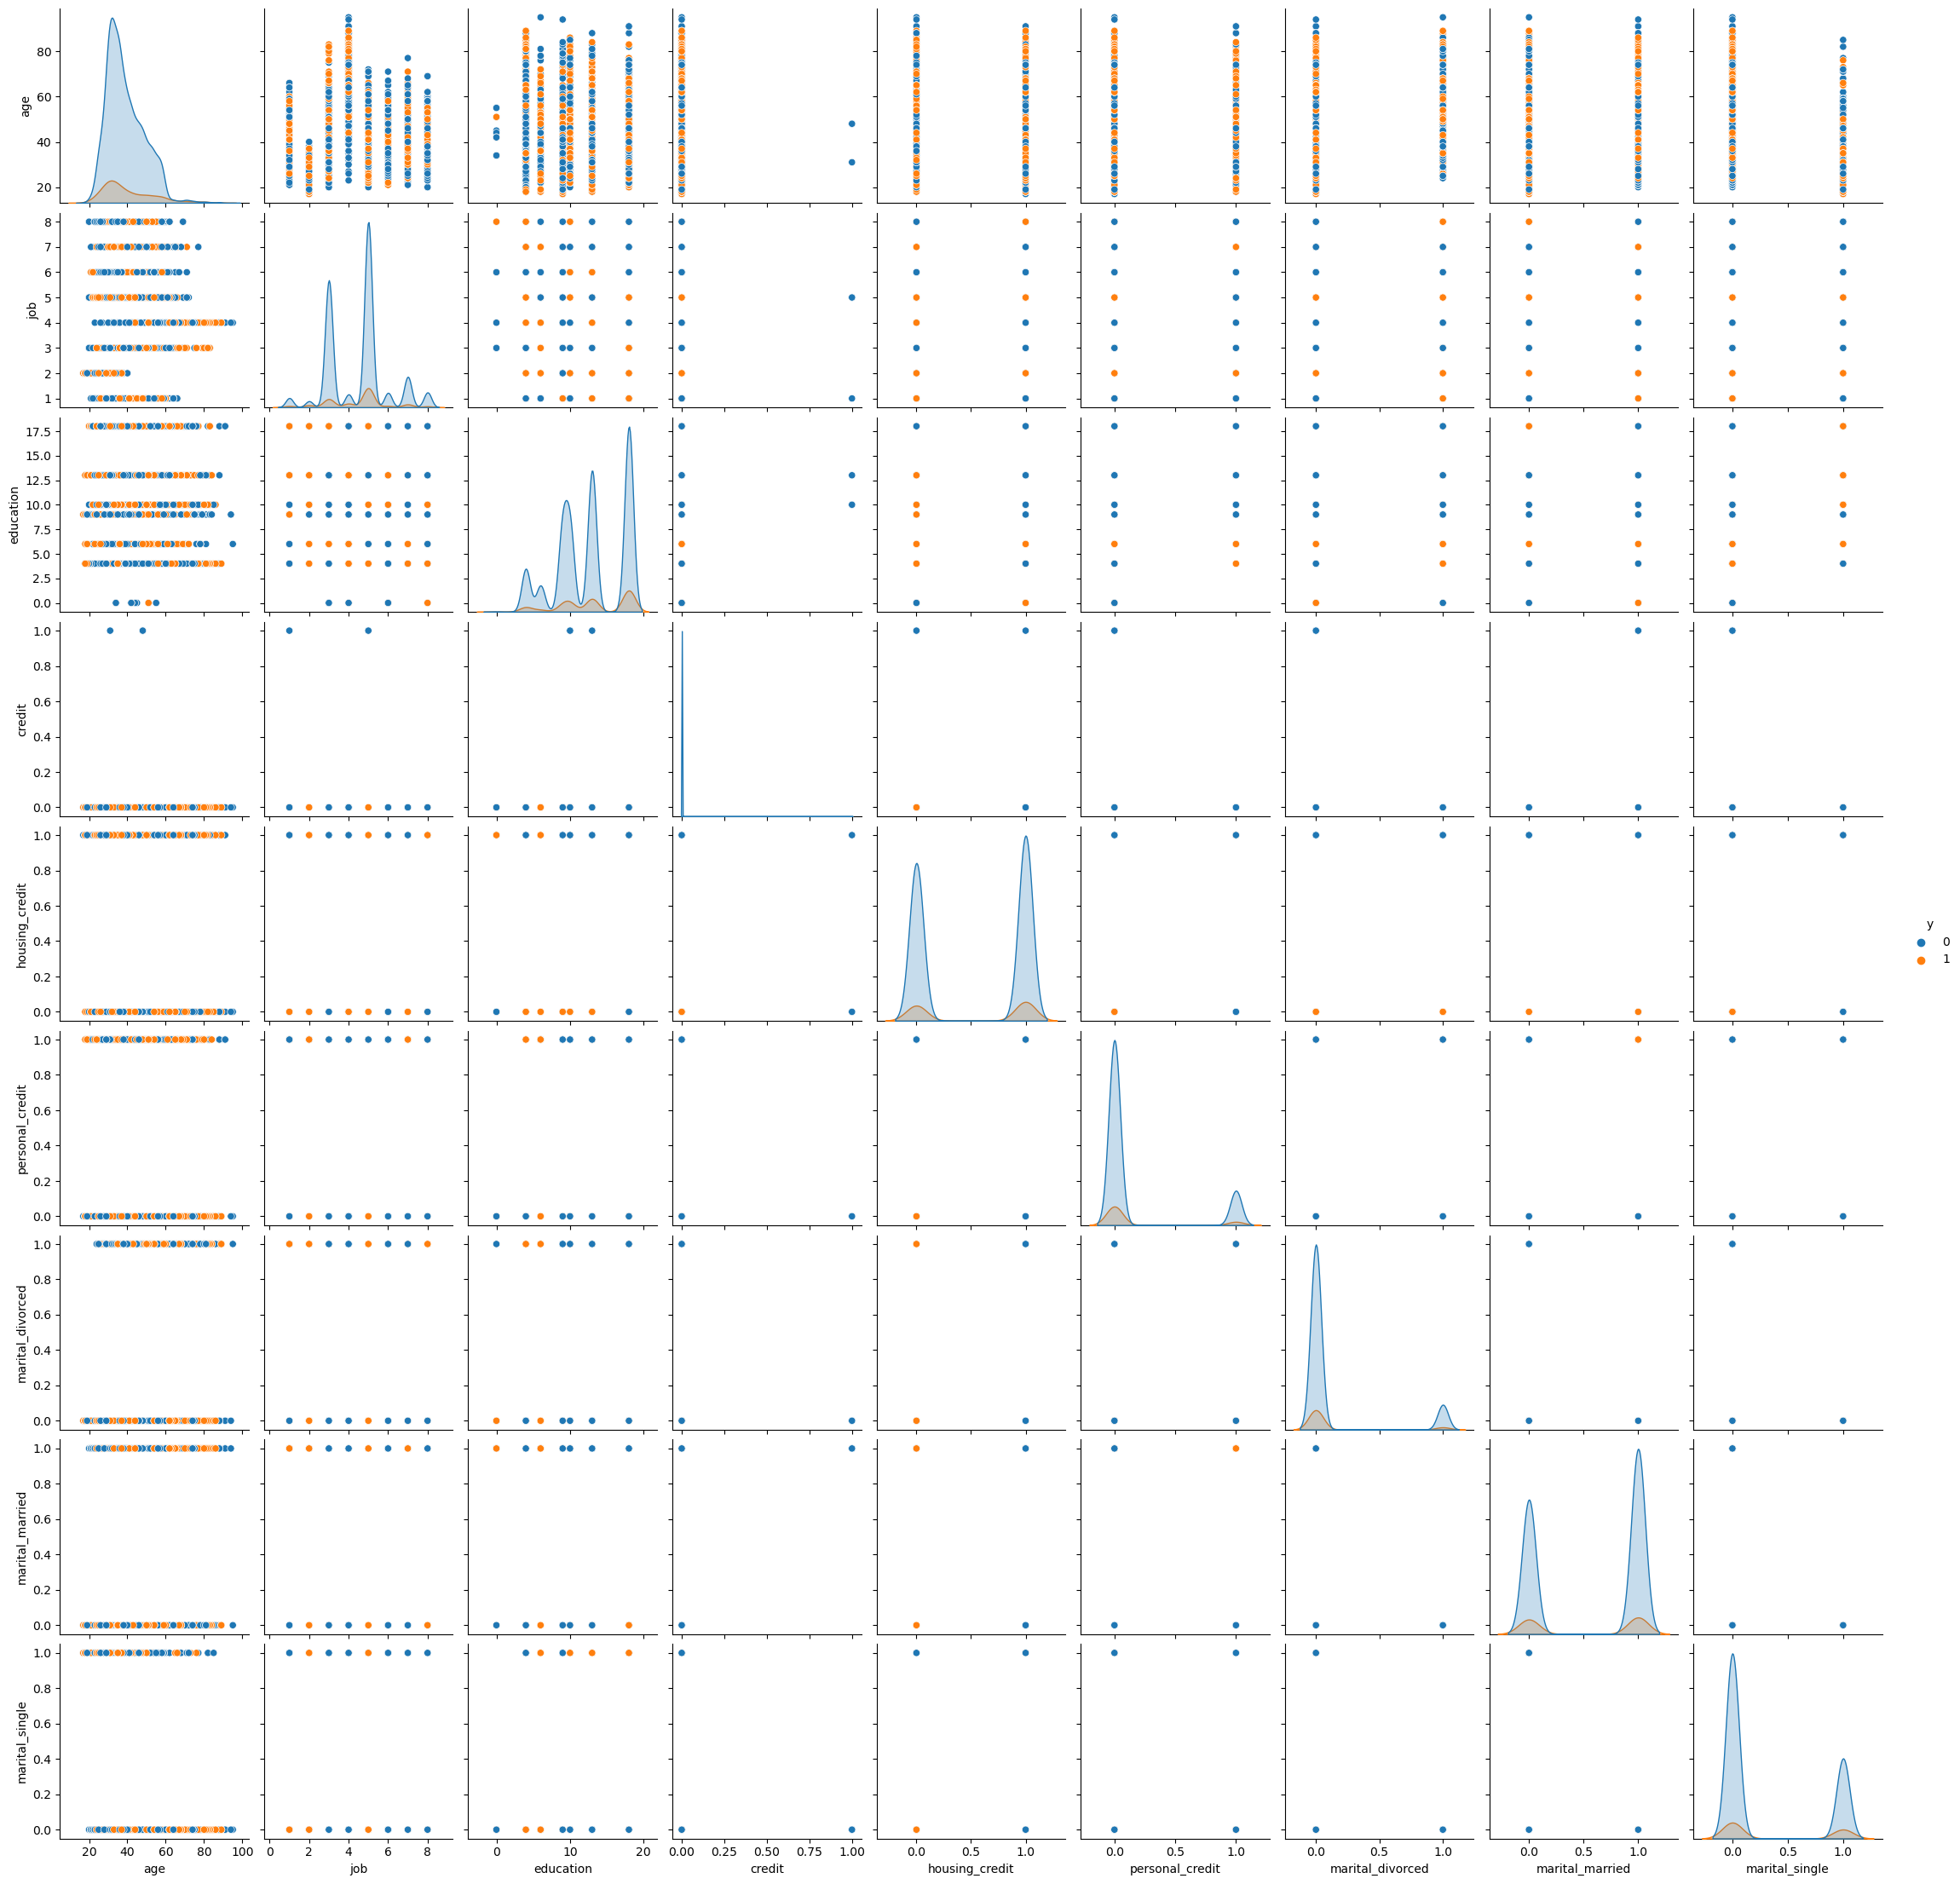

In [55]:
pair_plot = sns.pairplot(df, diag_kind="kde", hue="y")

Text(0, 0.5, 'Frequence')

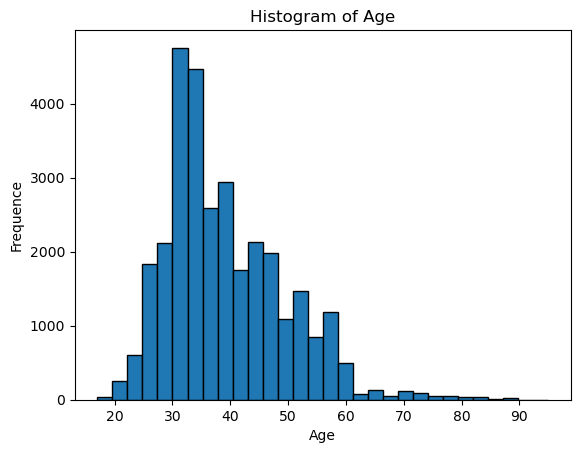

In [56]:
plt.hist(df['age'], edgecolor = 'black', bins = 30)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequence')

Text(0, 0.5, 'Frequence')

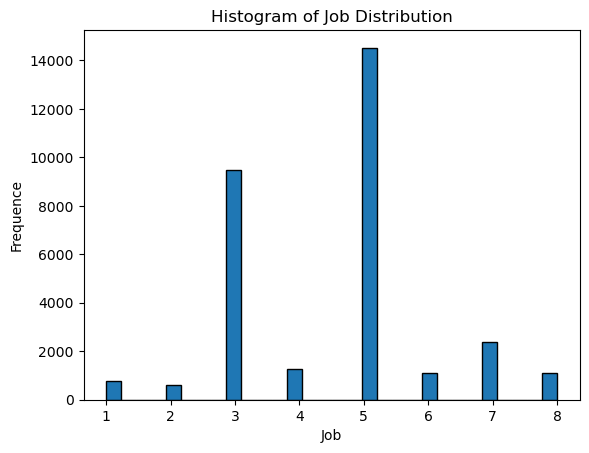

In [57]:
plt.hist(df['job'], edgecolor = 'black', bins = 30)
plt.title('Histogram of Job Distribution')
plt.xlabel('Job')
plt.ylabel('Frequence')

Text(0, 0.5, 'Frequence')

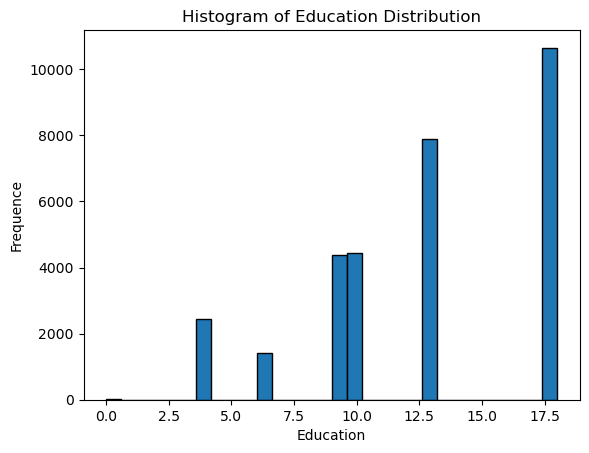

In [58]:
plt.hist(df['education'], edgecolor = 'black', bins = 30)
plt.title('Histogram of Education Distribution')
plt.xlabel('Education')
plt.ylabel('Frequence')

In [59]:
df['y'].value_counts()

0    27277
1     3950
Name: y, dtype: int64

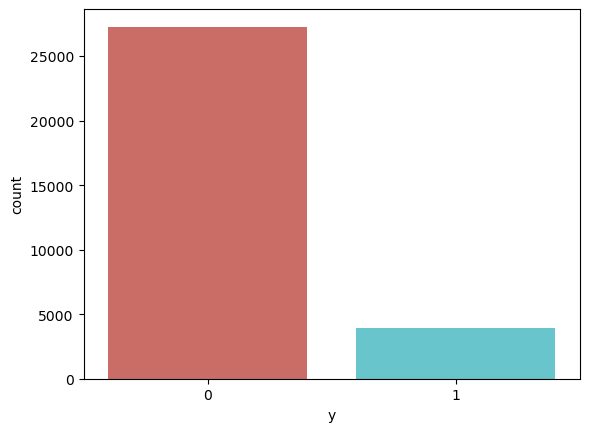

In [60]:
sns.countplot(x='y', data=df, palette='hls')
plt.show()

<Axes: >

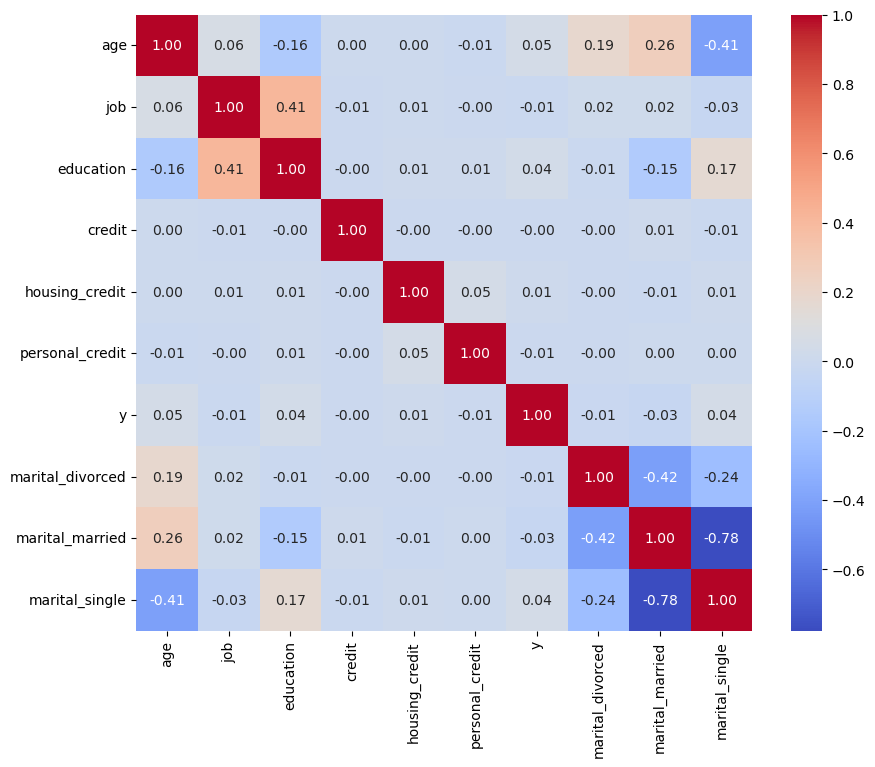

In [61]:
# Correlation matrix and heatmap
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True)

In [62]:
df_corr           = df.corr()[['y']]
df_highest_ten    = df_corr.nlargest(columns = 'y', n = 10) # zeigt die 10 größten Korraltionswerte

df_highest_ten['y']  = abs(df_highest_ten['y'])
df_highest_ten       = df_highest_ten.sort_values(by='y', ascending=False)
highest_corr         = df_highest_ten.index[1]

print(type(df_highest_ten))
print(df_highest_ten)
print()
print(f'Highest correlation is with: "{highest_corr}"')

<class 'pandas.core.frame.DataFrame'>
                         y
y                 1.000000
age               0.049276
marital_single    0.042758
education         0.039010
marital_married   0.031213
marital_divorced  0.013476
housing_credit    0.010071
job               0.006963
personal_credit   0.005026
credit            0.003730

Highest correlation is with: "age"


### Findings
The correlation function shows the credit and job features are not relevant for the examination.
The pairplot shows a complex relation between the features and the classify output. There are no clusters easy to see.
The 'countplot' shows the inplance of the date. There are only around 13% accept rows in the dataset.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [63]:
# devide the training and test set
X = df[['age','education', 'marital_divorced', 'marital_married', 'marital_single']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

The author defines as performance a accuracy greater than 85%!

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [64]:
results_df = ''
models     = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']

res_dict = {'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
           'train score': [0, 0, 0, 0],
           'test score': [0, 0, 0, 0],
           'average fit time': [0, 0, 0, 0]}

results_df = pd.DataFrame(res_dict).set_index('model')

In [65]:
def make_plot(estimator):
    xx = np.linspace(X.iloc[:, 0].min(), X_train.iloc[:, 0].max(), 50)
    yy = np.linspace(X.iloc[:, 1].min(), X_train.iloc[:, 1].max(), 50)
    XX, YY = np.meshgrid(xx, yy)
    grid = np.c_[XX.ravel(), YY.ravel()]
    labels = pd.factorize(estimator.predict(grid))[0]
    plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'twilight', alpha = 0.6)
    sns.scatterplot(data = X_train, x = 'total_phenols', y = 'color_intensity', hue = y_train,  palette = 'flare')

In [66]:
# Generate logReg model
params_log = {'C': np.logspace(1,4,10, 20, 30),
         'penalty': ['l1','l2']}

In [67]:
log  = LogisticRegression()
# Find with GridSearch the optimal hyperparameter
grid = GridSearchCV(log, param_grid=params_log).fit(X_train, y_train)
grid_train_acc = grid.score(X_train, y_train)
grid_test_acc  = grid.score(X_test, y_test)
best_params    = grid.best_params_
grid_time      = pd.DataFrame(grid.cv_results_)
print(f'Training Accuracy      : {grid_train_acc: .3f}')
print(f'Test Accuracy          : {grid_test_acc: .3f}')
print(f'Best parameters of tree: {best_params}')
#print(f'refit time             : {grid_time}')
#print(f'Mean fit time : {grid_time.describe().iloc[1,0]: .6f}')
#print('Coefficients : ', grid.cv_results_)

Training Accuracy      :  0.873
Test Accuracy          :  0.874
Best parameters of tree: {'C': 30.0, 'penalty': 'l2'}


In [68]:
# same the results in our result dictionary
start_time     = time.time()
res_dict['model'][0]             = LogisticRegression(C=30, penalty='l2', max_iter = 1000).fit(X_train, y_train)
grid_time      = time.time() - start_time
res_dict['train score'][0]       = res_dict['model'][0].score(X_train, y_train)
res_dict['test score'][0]        = res_dict['model'][0].score(X_test, y_test)
res_dict['average fit time'][0]  = grid_time
#res_dict['average fit time'][0]  = len(grid_time)*grid_time.describe().iloc[1,0]

In [69]:
# show the found coefficients
res_dict['model'][0].coef_
print(f'Intercept    : ', res_dict['model'][0].intercept_[0])
print(f'Coefficients : ', res_dict['model'][0].coef_)

Intercept    :  -2.423627094956414
Coefficients :  [[ 0.02393782  0.02527129 -1.0512568  -0.91759089 -0.45446549]]


In [70]:
X_test.head()

,age,education,marital_divorced,marital_married,marital_single
27700,26,18.0,0,1,0
27138,31,13.0,0,0,1
15623,48,13.0,1,0,0
38877,27,13.0,0,1,0
33949,36,9.0,1,0,0


In [71]:
# lets try some predictions
y_pred = res_dict['model'][0].predict(X_test)
df_test = [[26,18.0,0,1,0], [43,12.0,0,1,0]]
res_dict['model'][0].predict(df_test)

array([0, 0], dtype=int64)

### Problem 9: Score the Model

What is the accuracy of your model?

In [72]:
print(f'Training Accuracy      : {grid_train_acc : .3f}')
print(f'Test Accuracy          : {grid_test_acc: .3f}')
print(f'fit time [ms]          : {grid_time * 1000: .3f}')

Training Accuracy      :  0.873
Test Accuracy          :  0.874
fit time [ms]          :  38.897


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Model Classifier: KNN

In [73]:
start_time     = time.time()
knn = KNeighborsClassifier().fit(X_train, y_train)
grid_time      = time.time() - start_time
grid_train_acc = knn.score(X_train, y_train)
grid_test_acc  = knn.score(X_test, y_test)
#best_params    = grid.best_params_

In [74]:
print(f'Training Accuracy      : {grid_train_acc : .3f}')
print(f'Test Accuracy          : {grid_test_acc: .3f}')
print(f'fit time [ms]          : {grid_time * 1000: .3f}')

Training Accuracy      :  0.862
Test Accuracy          :  0.858
fit time [ms]          :  29.122


In [75]:
# save the results in our result dictionary
res_dict['model'][1]             = knn
res_dict['train score'][1]       = grid_train_acc
res_dict['test score'][1]        = grid_test_acc
res_dict['average fit time'][1]  = grid_time

### Model Classifier: Decision Tree

In [144]:
start_time     = time.time()
dtree          = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
grid_time      = time.time() - start_time
depth_1        = dtree.get_depth()
grid_train_acc = dtree.score(X_train, y_train)
grid_test_acc  = dtree.score(X_test, y_test)

print(f'Depth of tree: {depth_1}')

Depth of tree: 18


In [145]:
print(f'Training Accuracy      : {grid_train_acc : .3f}')
print(f'Test Accuracy          : {grid_test_acc: .3f}')
print(f'fit time [ms]          : {grid_time * 1000: .3f}')

Training Accuracy      :  0.878
Test Accuracy          :  0.873
fit time [ms]          :  15.872


In [146]:
# save the results in our result dictionary
res_dict['model'][2]             = dtree
res_dict['train score'][2]       = grid_train_acc
res_dict['test score'][2]        = grid_test_acc
res_dict['average fit time'][2]  = grid_time

[Text(0.6147449463481979, 0.9736842105263158, 'age <= 60.5\ngini = 0.221\nsamples = 21858\nvalue = [19090, 2768]\nclass = 0'),
 Text(0.3044199612044033, 0.9210526315789473, 'age <= 28.5\ngini = 0.209\nsamples = 21334\nvalue = [18801, 2533]\nclass = 0'),
 Text(0.053303839340587834, 0.868421052631579, 'marital_single <= 0.5\ngini = 0.298\nsamples = 2548\nvalue = [2084, 464]\nclass = 0'),
 Text(0.026680163406962873, 0.8157894736842105, 'education <= 15.5\ngini = 0.194\nsamples = 688\nvalue = [613, 75]\nclass = 0'),
 Text(0.018075991468132026, 0.7631578947368421, 'marital_married <= 0.5\ngini = 0.164\nsamples = 542\nvalue = [493, 49]\nclass = 0'),
 Text(0.016919128014171576, 0.7105263157894737, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]\nclass = 0'),
 Text(0.019232854922092476, 0.7105263157894737, 'age <= 27.5\ngini = 0.174\nsamples = 510\nvalue = [461, 49]\nclass = 0'),
 Text(0.01185785040309461, 0.6578947368421053, 'age <= 26.5\ngini = 0.151\nsamples = 341\nvalue = [313, 28]\nclass = 0')

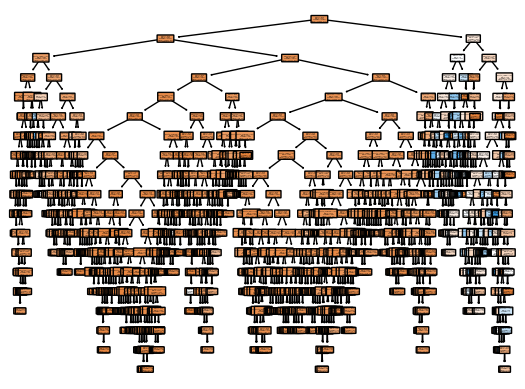

In [147]:
#lets plot the decision tree
tree.plot_tree(dtree, feature_names = ["age", "education", 'marital_divorced', 'marital_married', 'marital_single'],
              class_names = ['0', '1'],
              rounded = True, filled = True) 

### Model Classifier: SVM

In [79]:
start_time     = time.time()
svc  = SVC().fit(X_train, y_train)
grid_time      = time.time() - start_time
grid_train_acc = svc.score(X_train, y_train)
grid_test_acc  = svc.score(X_test, y_test)

In [80]:
print(f'Training Accuracy      : {grid_train_acc : .3f}')
print(f'Test Accuracy          : {grid_test_acc: .3f}')
print(f'fit time [ms]          : {grid_time * 1000: .3f}')

Training Accuracy      :  0.873
Test Accuracy          :  0.874
fit time [ms]          :  4345.976


In [81]:
# save the results in our result dictionary
res_dict['model'][3]             = svc
res_dict['train score'][3]       = grid_train_acc
res_dict['test score'][3]        = grid_test_acc
res_dict['average fit time'][3]  = grid_time

In [82]:
res_dict

{'model': [LogisticRegression(C=30, max_iter=1000),
  KNeighborsClassifier(),
  DecisionTreeClassifier(random_state=42),
  SVC()],
 'train score': [0.8733644432244487,
  0.8617897337359319,
  0.878122426571507,
  0.8733644432244487],
 'test score': [0.8738392571245597,
  0.8578290105667628,
  0.8733055822392998,
  0.8738392571245597],
 'average fit time': [0.03889727592468262,
  0.029122352600097656,
  0.009618997573852539,
  4.345976114273071]}

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Use Gender Feature?

The gender feature could have similar information like marital. The marital features are not relevant according to the correlation results. Therefore the author believe the gender feature is not relevant.

## Hyperparamter tuning

### Model Classifier: KNN

In [190]:
# set the search parameter
params_knn = dict(n_neighbors= [1, 2, 3, 5, 10, 15, 20, 25, 30])
print(params_knn)
print(type(params_knn))

{'n_neighbors': [1, 2, 3, 5, 10, 15, 20, 25, 30]}
<class 'dict'>


In [191]:
grid = GridSearchCV(knn, param_grid=params_knn, scoring='accuracy', cv=10).fit(X_train, y_train)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 5, 10, 15, 20, 25, 30]},
             scoring='accuracy')

In [192]:
grid_train_acc = grid.score(X_train, y_train)
grid_test_acc  = grid.score(X_test, y_test)
best_params    = grid.best_params_
grid_time      = pd.DataFrame(grid.cv_results_)
print(f'Training Accuracy      : {grid_train_acc: .3f}')
print(f'Test Accuracy          : {grid_test_acc: .3f}')
print(f'Best parameters of tree: {best_params}')
print(f'Mean fit time          : {grid_time.describe().iloc[1,0]: .6f}')

Training Accuracy      :  0.875
Test Accuracy          :  0.874
Best parameters of tree: {'n_neighbors': 20}
Mean fit time          :  0.024428


In [193]:
# save the results in our result dictionary
start_time     = time.time()
res_dict['model'][1]             = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)
grid_time      = time.time() - start_time
res_dict['train score'][1]       = grid_train_acc
res_dict['test score'][1]        = grid_test_acc
res_dict['average fit time'][1]  = grid_time

### Model Classifier: Decision Tree

In [173]:
# set the search parameter
# ---> old parameter set! --> result was only on leaf --> use an other parameter set
params_dtree = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
                'max_depth': [2, 5, 10, 15, 20],
                'min_samples_split': [0.1, 0.2, 0.05]}
print(params_dtree)
print(type(params_dtree))

{'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05], 'max_depth': [2, 5, 10, 15, 20], 'min_samples_split': [0.1, 0.2, 0.05]}
<class 'dict'>


In [175]:
# set the search parameter
# use only max_depth for searching via GridSearchCV
params_dtree = {'max_depth': [2, 5, 10, 15, 20], 'criterion': ['gini', 'entropy']}
print(params_dtree)
print(type(params_dtree))

{'max_depth': [2, 5, 10, 15, 20], 'criterion': ['gini', 'entropy']}
<class 'dict'>


In [176]:
grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params_dtree).fit(X_train, y_train)
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 15, 20]})

In [177]:
grid_train_acc = grid.score(X_train, y_train)
grid_test_acc  = grid.score(X_test, y_test)
best_params    = grid.best_params_
grid_time      = pd.DataFrame(grid.cv_results_)
print(f'Training Accuracy      : {grid_train_acc: .3f}')
print(f'Test Accuracy          : {grid_test_acc: .3f}')
print(f'Best parameters of tree: {best_params}')
#print(f'refit time             : {grid_time}')
print(f'Mean fit time          : {grid_time.describe().iloc[1,0]: .6f}')

Training Accuracy      :  0.875
Test Accuracy          :  0.874
Best parameters of tree: {'criterion': 'gini', 'max_depth': 5}
Mean fit time          :  0.008200


In [182]:
start_time     = time.time()
dtree          = DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_train, y_train)
grid_time      = time.time() - start_time
depth_1        = dtree.get_depth()
grid_train_acc = dtree.score(X_train, y_train)
grid_test_acc  = dtree.score(X_test, y_test)

print(f'Depth of tree:   {depth_1}')
print(f'Leaves of tree: ', dtree.get_n_leaves())

Depth of tree:   5
Leaves of tree:  30


In [165]:
print(f'Training Accuracy      : {grid_train_acc : .3f}')
print(f'Test Accuracy          : {grid_test_acc: .3f}')
print(f'fit time [ms]          : {grid_time * 1000: .3f}')

Training Accuracy      :  0.875
Test Accuracy          :  0.874
fit time [ms]          :  8.103


In [170]:
# save the results in our result dictionary
res_dict['model'][2]             = dtree
res_dict['train score'][2]       = grid_train_acc
res_dict['test score'][2]        = grid_test_acc
res_dict['average fit time'][2]  = grid_time

[Text(0.5258620689655172, 0.9166666666666666, 'age <= 60.5\ngini = 0.221\nsamples = 21858\nvalue = [19090, 2768]\nclass = 0'),
 Text(0.27586206896551724, 0.75, 'age <= 28.5\ngini = 0.209\nsamples = 21334\nvalue = [18801, 2533]\nclass = 0'),
 Text(0.13793103448275862, 0.5833333333333334, 'marital_single <= 0.5\ngini = 0.298\nsamples = 2548\nvalue = [2084, 464]\nclass = 0'),
 Text(0.06896551724137931, 0.4166666666666667, 'education <= 15.5\ngini = 0.194\nsamples = 688\nvalue = [613, 75]\nclass = 0'),
 Text(0.034482758620689655, 0.25, 'marital_married <= 0.5\ngini = 0.164\nsamples = 542\nvalue = [493, 49]\nclass = 0'),
 Text(0.017241379310344827, 0.08333333333333333, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]\nclass = 0'),
 Text(0.05172413793103448, 0.08333333333333333, 'gini = 0.174\nsamples = 510\nvalue = [461, 49]\nclass = 0'),
 Text(0.10344827586206896, 0.25, 'marital_divorced <= 0.5\ngini = 0.293\nsamples = 146\nvalue = [120, 26]\nclass = 0'),
 Text(0.08620689655172414, 0.08333333333

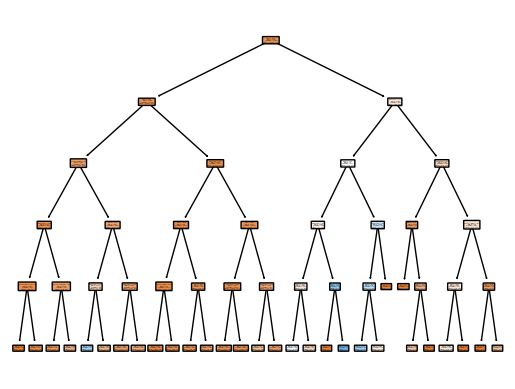

In [167]:
tree.plot_tree(dtree, feature_names = ["age", "education", 'marital_divorced', 'marital_married', 'marital_single'],
              class_names = ['0', '1'],
              rounded = True, filled = True) 

### Model Classifier: SVM

In [172]:
# set parameter for svm grid search
# only use complex kernel for optimizing, with seven features the linear kernel could not find a solution.
params_svc = {'kernel': ['sigmoid', 'rbf'],
              'gamma' : [0.1, 1.0, 10.0, 100.0]}

In [108]:
# Find with GridSearch the optimal hyperparameter
grid = GridSearchCV(SVC(), param_grid=params_svc).fit(X_train, y_train)
grid_train_acc = grid.score(X_train, y_train)
grid_test_acc  = grid.score(X_test, y_test)
best_params    = grid.best_params_
grid_time      = pd.DataFrame(grid.cv_results_)
print(f'Training Accuracy      : {grid_train_acc: .3f}')
print(f'Test Accuracy          : {grid_test_acc: .3f}')
print(f'Best parameters of tree: {best_params}')
print(f'refit time             : {grid_time}')
print(f'Mean fit time : {grid_time.describe().iloc[1,0]: .6f}')

Training Accuracy      :  0.875
Test Accuracy          :  0.873
Best parameters of tree: {'gamma': 0.1, 'kernel': 'rbf'}
refit time             :    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
0       1.635433      0.002199         0.381814        0.008788         0.1   
1       3.753064      0.160538         1.506665        0.013415         0.1   
2       1.616860      0.000507         0.379796        0.006732         1.0   
3       3.483341      0.000366         1.663045        0.012475         1.0   
4       1.626826      0.013267         0.373288        0.008168        10.0   
5       4.879788      0.012585         2.096588        0.006579        10.0   
6       1.623243      0.013427         0.376675        0.008244       100.0   
7       5.133229      0.025757         2.173184        0.008080       100.0   

  param_kernel                                 params  split0_test_score  \
0      sigmoid    {'gamma': 0.1, 'kernel': 'sigmoid'}           0.

In [109]:
start_time     = time.time()
svc  = SVC(kernel='rbf', gamma=1.0).fit(X_train, y_train)
grid_time      = time.time() - start_time
grid_train_acc = svc.score(X_train, y_train)
grid_test_acc  = svc.score(X_test, y_test)

In [110]:
print(f'Training Accuracy      : {grid_train_acc : .3f}')
print(f'Test Accuracy          : {grid_test_acc: .3f}')
print(f'fit time [ms]          : {grid_time * 1000: .3f}')

Training Accuracy      :  0.877
Test Accuracy          :  0.874
fit time [ms]          :  5324.799


In [111]:
# save the results in our result dictionary
res_dict['model'][3]             = svc
res_dict['train score'][3]       = grid_train_acc
res_dict['test score'][3]        = grid_test_acc
res_dict['average fit time'][3]  = grid_time

In [119]:
# Lets have a closer look on the support vectors.
# get the support vectors for the SVM
# The support vectors are the samples that lie within the margin boundaries, whose size is contrainted to 1
descision_func   = svc.decision_function(X_train)
support_vect_idx = np.where(np.abs(descision_func) <= 1 + 1e-15)[0]

In [134]:
print(type(support_vect_idx))
df_support_vect_idx = pd.DataFrame(support_vect_idx)
#df_support_vect_idx.info()
print('Total support vectors:        ', len(df_support_vect_idx))
print('Total support samples:        ', len(X_train))
print('Support vectors sample ratio: ', round(len(df_support_vect_idx)/len(X_train)*100, 2), '%')

<class 'numpy.ndarray'>
Total support vectors:         13486
Total support samples:         21858
Support vectors sample ratio:  61.7 %


## Evaluate the Results

In [171]:
results_df = pd.DataFrame(res_dict).set_index('model')
print(results_df)

                                                    train score  test score  \
model                                                                         
LogisticRegression(C=30, max_iter=1000)                0.873364    0.873839   
KNeighborsClassifier(n_neighbors=20)                   0.874645    0.873733   
DecisionTreeClassifier(max_depth=5, random_stat...     0.874691    0.873839   
SVC(gamma=1.0)                                         0.877299    0.874159   

                                                    average fit time  
model                                                                 
LogisticRegression(C=30, max_iter=1000)                     0.038897  
KNeighborsClassifier(n_neighbors=20)                        0.016412  
DecisionTreeClassifier(max_depth=5, random_stat...          0.008103  
SVC(gamma=1.0)                                              5.324799  


## Findings

### Technical Side

The results of the optimized classificator show equal results on all four variants. The big difference is only the fitting time of the different algorithm. 
The svm model uses 62% of the total samples for support vectors. This is a very high level and shows the complexity of the model. It could be a hint to find other features to make easier decisions in the hyperroom. The found decision tree model has a depth of 5. This is a good value for predicting. There are maximum five decision to made to get the final decision. Therefore the decision tree is the fastest model for prediction.

### Business Side
The author found four different models with a similar quality. All four have differnet properties. 
The 'DecisionTree' model could be used for the marketing to understand the behavior of the telephone clients. Therefore the tree graph could be used from responsible person in the marketing for further decisions. The 'LogisticRegression' model is good for computing the classification. Therefore the prediction could be done in a small excel sheet. The SVM model is too complex for the prediction. In case of prediction the user have to compute the decision with around 13.500 support vectors. This is not a easy job. Therefore a computer program is necessary. The predictions of the 'KNN' model is similar hard to compute as for the 'SVM' model. Therefore from the usability the author recommends the 'LogisticRegression' or the 'DecisionTree' model for further use.

##### Questions